In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


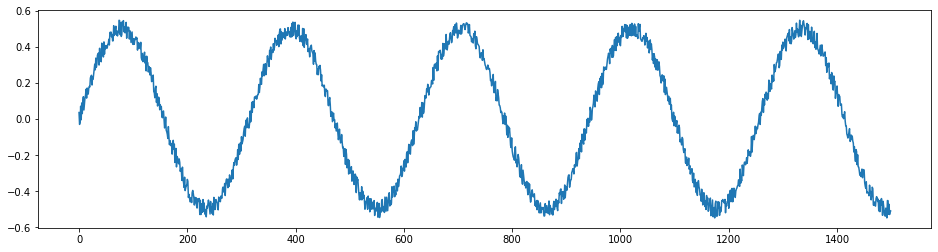

In [2]:
N=1500
t=np.arange(0,N)
data_sine=np.sin(0.02*t)/2+np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_sine)
plt.show()


In [3]:
from re import S
def convertsignaltodataset(signal,step):
  X=[]
  Y=[]
  for i in range(len(signal)-step):
    j=i+step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X),np.array(Y)


In [4]:
X_sine,Y_sine=convertsignaltodataset(data_sine,40)
#X_square,Y_square=convertsignaltodataset(data_square,40,label=1)
#X_tringle,Y_tringle=convertsignaltodataset(data_tringle,40,label=2)

In [5]:
X_sine.shape

(1460, 40)

In [6]:
X_train = np.array(X_sine[0:800])
Y_train = np.array(Y_sine[0:800])
X_test = np.array(X_sine[800:len(X_sine)])
Y_test = np.array(Y_sine[800:len(Y_sine)])

In [7]:
X_train=X_train[...,np.newaxis]
X_test=X_test[...,np.newaxis]

In [8]:
print(X_test.shape)

(660, 40, 1)


In [9]:
model=tf.keras.models.Sequential([layers.SimpleRNN(units=64,input_shape=(None,1))
,layers.Dense(1)])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MSE)

In [11]:
model.fit(X_train,Y_train,epochs=30,batch_size=16)

Epoch 1/30
50/50 [==============================] - 2s 12ms/step - loss: 0.0028
Epoch 2/30
50/50 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 3/30
50/50 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 4/30
50/50 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 5/30
50/50 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 6/30
50/50 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 7/30
50/50 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 8/30
50/50 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 9/30
50/50 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 10/30
50/50 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 11/30
50/50 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 12/30
50/50 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 13/30
50/50 [==================

In [12]:
model.evaluate(X_test,Y_test)

21/21 [==============================] - 0s 4ms/step - loss: 0.0011


0.0011024839477613568

inference